### Problem 3.1 What kind of mapping from input to output would be created if the activation function in equation 3.1 was linear so that a[z] = ψ0 + ψ1z? What kind of mapping would be created if the activation function was removed, so a[z] = z?

Both of these would create a linear mapping.  Removing the activation function just leaves you with the linear part:

$h = a[\phi_0 + \phi_1 x] = \phi_0 + \phi_1 x$

Linear functions compose so in the linear activation case we get

$h = a[\phi_0 + \phi_1 x] = \psi_0 + \psi_1(\phi_0 + \phi_1 x) = \phi^*_0 + \phi^*_1 x$


### Problem 3.2 For each of the four linear regions in figure 3.3j, indicate which hidden units are inactive and which are active (i.e., which do and do not clip their inputs).

1. 3
2. 1 and 3
3. 1, 2, and 3
4. 1 and 2


### Problem 3.3∗ Derive expressions for the positions of the “joints” in function in figure 3.3j in terms of the ten parameters ϕ and the input x. Derive expressions for the slopes of the four linear regions.

The preactivations are given by

\begin{align}
    z_i &= \theta_{i0} + \theta_{i1}x \\    
\end{align}

Joints occur where units activate, ie, where z = 0.  So we can get expressions for the joints $x^*$ as 

\begin{align}
    x^*_i &= -\frac{\theta_{i0}}{\theta_{i1}} \\
\end{align}

In a particular region, the output is given by

\begin{align}
    y &= \phi_0 + \phi_1 h_1 + \phi_2\ h_2 + \phi_3 h_3 \\
\end{align}

We can compute the slope in a region by expanding out and ignoring terms that only contribute to the intercept

\begin{align}
    \phi_1 h_1 + \phi_2\ h_2 + \phi_3 h_3 &= \phi_1 * a[z_1] + \phi_2 * a[z_2] + \phi_3 * a[z_3]\\
    &= \sum \phi_i * max(0, \theta_{i0} + \theta_{i1}x)\\
    &~= \sum max(0, \phi_i \theta_{i1} x)\\
\end{align}

Which tells us that the slope in a region is the sum of the product $\phi_i \theta_{i1}$ over all $i$ units active in the region.  Specifically:

1. $\phi_3 \theta_{31}$
2. $\phi_1 \theta_{11} + \phi_3 \theta_{31}$
3. $\phi_1 \theta_{11} + \phi_2 \theta_{21} + \phi_3 \theta_{31}$
4. $\phi_1 \theta_{11} + \phi_2 \theta_{21}$



### Problem 3.4 Draw a version of figure 3.3 where the y-intercept and slope of the third hidden unit have changed as in figure 3.14c. Assume that the remaining parameters remain the same.

Skipping.  This is similar manipulation to notebook 3_1

### Problem 3.5 Prove that the following property holds for α ∈ R+: ReLU[α · z] = α · ReLU[z]. (3.14) This is known as the non-negative homogeneity property of the ReLU function.

Let's rewrite:

\begin{align}
    ReLU[z] &= max(0, z) \\
    &= \frac{z + |z|}{2}
\end{align}

From which we can see

\begin{align}
    ReLU[\alpha \cdot z] &= \frac{\alpha \cdot z + |\alpha \cdot z|}{2} \\
    &= \alpha \cdot \frac{z + |z|}{2} \\
    &= \alpha \cdot ReLU[z]
\end{align}

where we have used the fact that $\alpha \ge 0$ to extract it from the absolute value in line 2.


### Problem 3.6 Following on from problem 3.5, what happens to the shallow network defined in equations 3.3 and 3.4 when we multiply the parameters θ10 and θ11 by a positive constant α and divide the slope ϕ1 by the same parameter α? What happens if α is negative?

If alpha is positive, scaling the thetas by alpha and the corresponding slope by 1/alpha produces the same response. If alpha is negative, we get an entirely different response as multiplication with a negative constant does not commute with the ReLU operation.

### Problem 3.7 Consider fitting the model in equation 3.1 using a least squares loss function. Does this loss function have a unique minimum? i.e., is there a single “best” set of parameters?

The model does not have a unique minimum.  As discussed in the previous problem, we can trade magnitude between the theta parameters and the corresponding phi parameter. This implies that for every model loss there is a continuous 3d manifold of equivalent solutions with exactly the same loss.

### Problem 3.8 Consider replacing the ReLU activation function with (i) the Heaviside step function heaviside[z], (ii) the hyperbolic tangent function tanh[z], and (iii) the rectangular function rect[z], where: heaviside[z] = (0 z < 0 1 z ≥ 0 rect[z] = 0 z < 0 1 0 ≤ z ≤ 1 0 z > 1. (3.15) Redraw a version of figure 3.3 for each of these functions. The original parameters were: ϕ = {ϕ0, ϕ1, ϕ2, ϕ3, θ10, θ11, θ20, θ21, θ30, θ31} = {−0.23, −1.3, 1.3, 0.66, −0.2, 0.4, −0.9, 0.9, 1.1, −0.7}. Provide an informal description of the family of functions that can be created by neural networks with one input, three hidden units, and one output for each activation function.

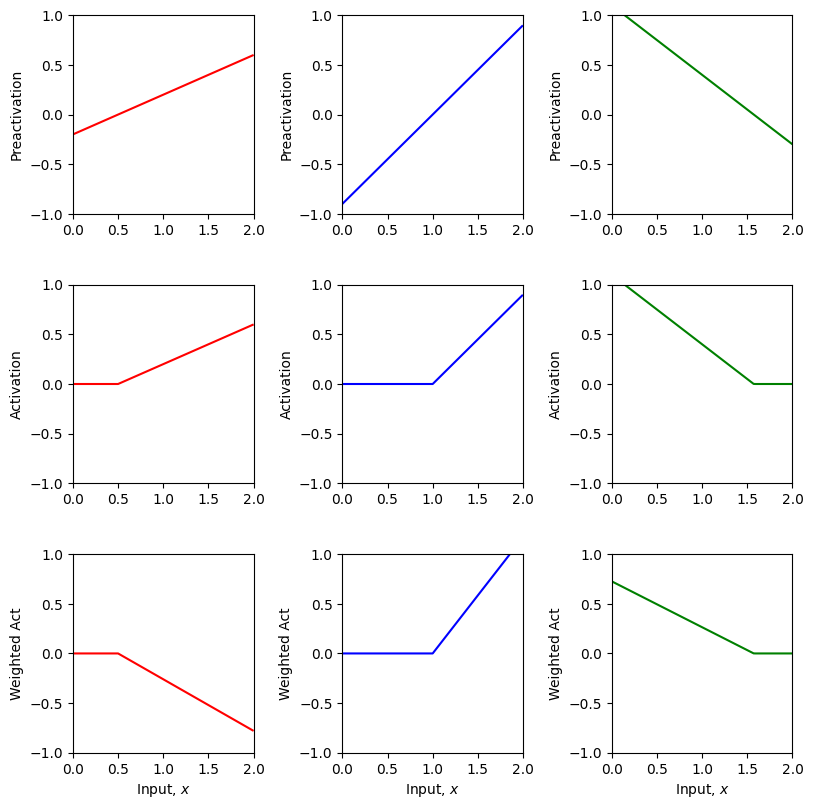

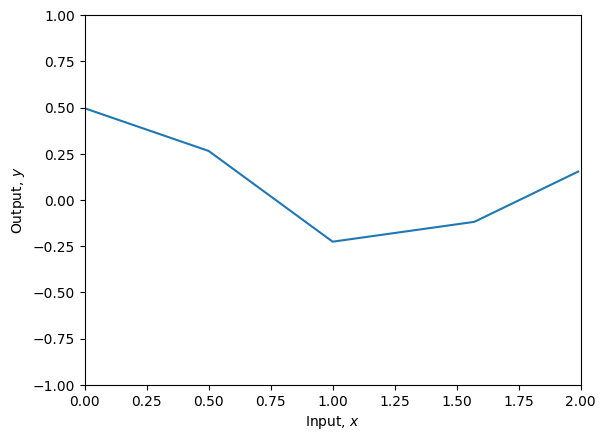

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(
    x, 
    activation_fn, 
    phi_0,
    phi_1,
    phi_2,
    phi_3, 
    theta_10, 
    theta_11, 
    theta_20, 
    theta_21, 
    theta_30, 
    theta_31,
):
  # TODO Replace the code below to compute the three initial lines
  # from the theta parameters (i.e. implement equations at bottom of figure 3.3a-c).  These are the preactivations
  pre_1 = theta_10 + theta_11*x
  pre_2 = theta_20 + theta_21*x
  pre_3 = theta_30 + theta_31*x  

  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.3 g-i
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  
  # TODO Replace the code below to combining the weighted activations and add
  # phi_0 to create the output as in figure 3.3 j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,2]);ax[plot_x,plot_y].set_ylim([-1,1])        
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,2]);ax.set_ylim([-1,1])  
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()




def run_network(
    activation_fn,
    theta_10=-0.2, theta_11=0.4,
    theta_20=-0.9, theta_21=0.9,
    theta_30=1.1, theta_31=-0.7,
    phi_0=-0.23, phi_1=-1.3, phi_2=1.3, phi_3=0.66,
    plot_all=True
):    
    # Define a range of input values
    x = np.arange(0,2,0.01)
    
    # We run the neural network for each of these input values
    y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
        shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
    # And then plot it
    plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=plot_all)

def relu(z):
    return z.clip(0)

def heaviside(z):
    return (z >= 0).astype(float)

def rect(z):
    return ((0 <= z) & (z <= 1)).astype(float)


def tanh(z):
    return np.tanh(z)
    

run_network(relu)

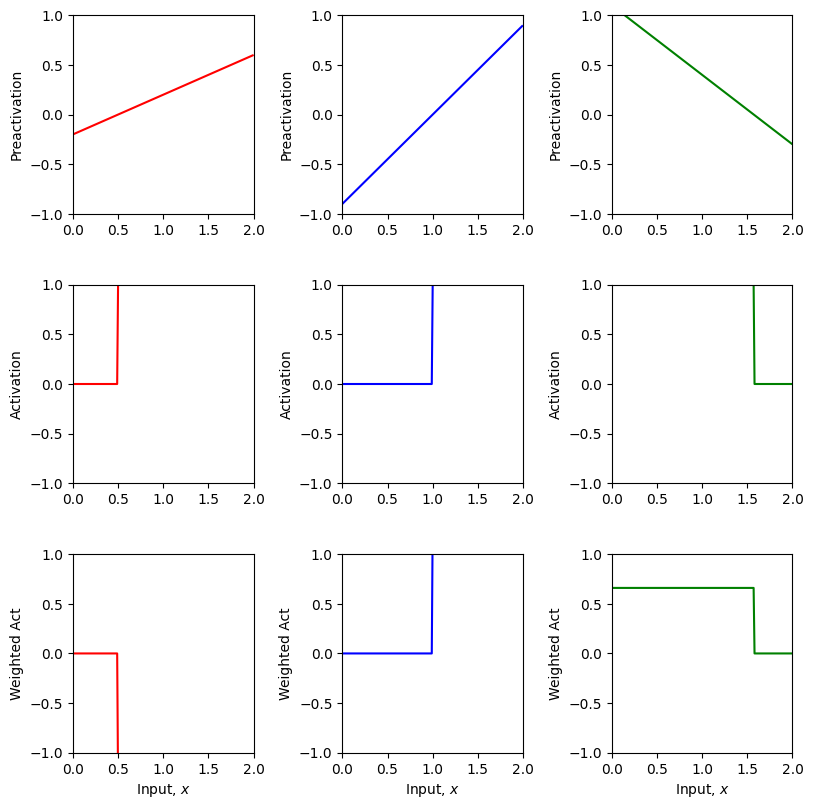

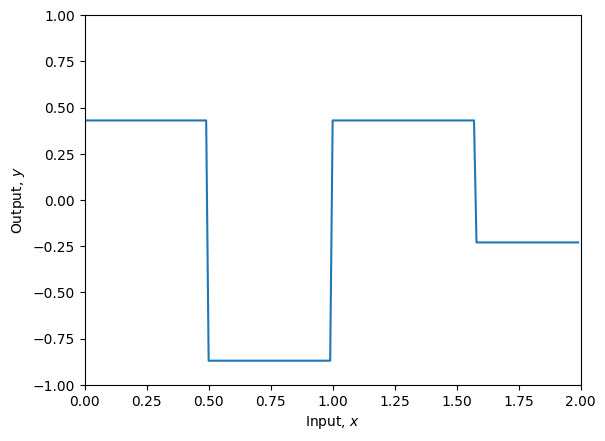

In [2]:
run_network(heaviside)

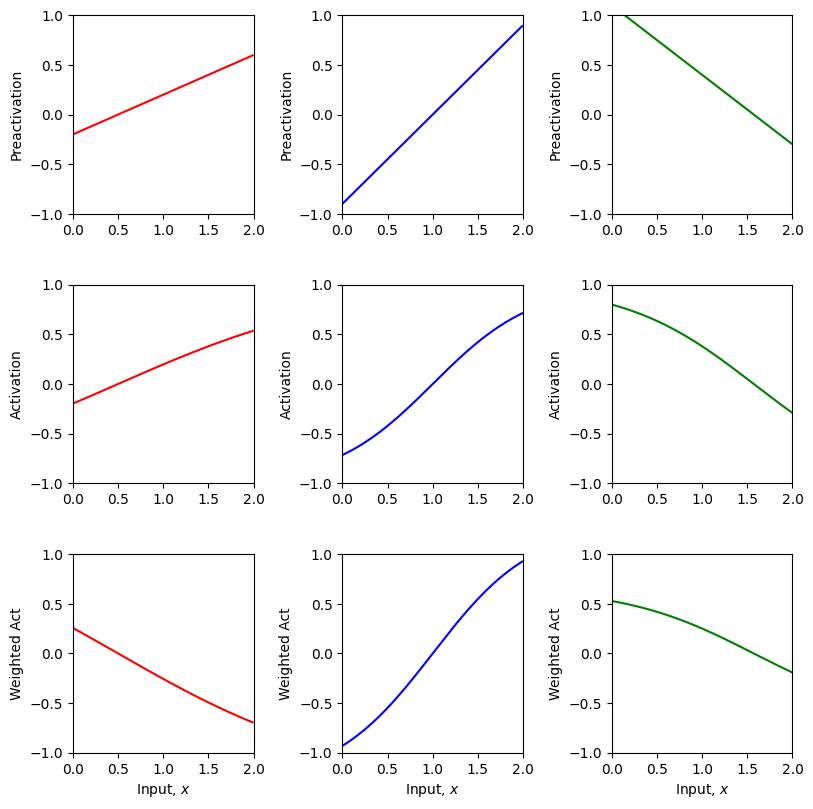

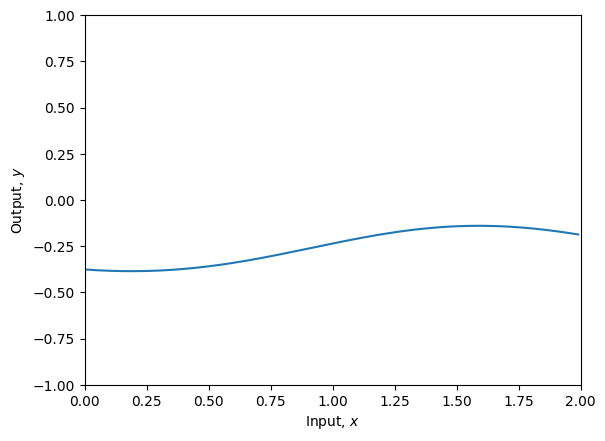

In [3]:
run_network(tanh)

### Problem 3.9∗ Show that the third linear region in figure 3.3 has a slope that is the sum of the slopes of the first and fourth linear regions.

This follows directly from 3.3

### Problem 3.10 Consider a neural network with one input, one output, and three hidden units.The construction in figure 3.3 shows how this creates four linear regions. Under what circumstances could this network produce a function with fewer than four linear regions?

This was explored in notebook 3_1

### Problem 3.11∗ How many parameters does the model in figure 3.6 have?

$D_i = 1$

$D_h = 4$

$D_o = 2$

$D_i \rightarrow D_h = (D_i + 1) * D_h = (1 + 1) * 4 = 8$

$D_h \rightarrow D_o = (D_h + 1) * D_o = (4 + 1) * 2 = 10$

So 18 parameters.

### Problem 3.12 How many parameters does the model in figure 3.7 have?

$D_i = 2$

$D_h = 3$

$D_o = 1$

$D_i \rightarrow D_h = (D_i + 1) * D_h = (2 + 1) * 3 = 9$

$D_h \rightarrow D_o = (D_h + 1) * D_o = (3 + 1) * 1 = 3$

So 12 parameters.

### Problem 3.13 What is the activation pattern for each of the seven regions in figure 3.8? In other words, which hidden units are active (pass the input) and which are inactive (clip the input) for each region?

Using the unit 3 bar as a divisor and going left to right

1. None
2. 1
3. 1 and 2
4. 3
5. 1 and 3 (middle)
6. 1, 2 , and 3
7. 2 and 3 (bottom middle)

### Problem 3.14 Write out the equations that define the network in figure 3.11. There should be three equations to compute the three hidden units from the inputs and two equations to compute the outputs from the hidden units.


\begin{align}
    h_1 &= a[\theta_{10} + \theta_{11} x_1 + \theta_{12} x_2 + \theta_{13} x_3] \\
    h_2 &= a[\theta_{20} + \theta_{21} x_1 + \theta_{22} x_2 + \theta_{23} x_3] \\
    h_3 &= a[\theta_{30} + \theta_{31} x_1 + \theta_{32} x_2 + \theta_{33} x_3] \\
    y_1 &= \phi_{10} + \phi_{11} h_1 + \phi_{12} h_2 + \phi_{13} h_3 \\
    y_2 &= \phi_{20} + \phi_{21} h_1 + \phi_{22} h_2 + \phi_{23} h_3 \\
\end{align}

### Problem 3.15∗ What is the maximum possible number of 3D linear regions that can be created by the network in figure 3.11?

The number of dimensions goes as 

\begin{align}
    N &= \sum\limits_{i=0}^{D_i} {D \choose i} \\
\end{align}

Here we have D_i = 3 and D = 3 so we get 

\begin{align}
    {3 \choose 0} + {3 \choose 1} + {3 \choose 2} + {3 \choose 3} = 1 + 3 + 3 + 1 = 8
\end{align}

### Problem 3.16 Write out the equations for a network with two inputs, four hidden units, and three outputs. Draw this model in the style of figure 3.11.

Pass, this is not helpful at this point.


### Problem 3.17∗ Equations 3.11 and 3.12 define a general neural network with Di inputs, one hidden layer containing D hidden units, and Do outputs. Find an expression for the number of parameters in the model in terms of Di, D, and Do.

Parameters between the input layer and the hidden layer are 

$D_i \rightarrow D_h = (D_i + 1) * D$

and then between the hidden layer and the output layer are 

$D \rightarrow D_o = (D + 1) * D_o$

so in total we have

$Params = (D_i + 1)*D + (D + 1)*D_o$


### Problem 3.18∗ Show that the maximum number of regions created by a shallow network with Di = 2-dimensional input, Do = 1-dimensional output, and D = 3 hidden units is seven, as in figure 3.8j. Use the result of Zaslavsky (1975) that the maximum number of regions created by partitioning a Di-dimensional space with D hyperplanes is PDi j=0 Dj. What is the maximum number of regions if we add two more hidden units to this model, so D = 5?

For $D_i = 2$ and $D = 3$ we have 

\begin{align}
    {3 \choose 0} + {3 \choose 1} + {3 \choose 2} = 1 + 3 + 3 = 7
\end{align}

With $D = 5$ hidden units we get a max of 

\begin{align}
    {5 \choose 0} + {5 \choose 1} + {5 \choose 2} = 1 + 5 + 10 = 16
\end{align}